# Shashwat.ipynb
This file processes the *CityParks.csv* file in order to use the data to help determine the best neighborhood in Pittsburgh for recreation
### Below is what the csv file looks like

In [ ]:
#imports pandas
import pandas as pd

In [3]:
#imports csv file and prints
park = pd.read_csv("CityParks.csv", index_col = "_id")
park

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1460363095,Woods Run Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.476383,-80.029253
206,930068146,Young Field Park,Park,Parks - Northern,NaN,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.472963,-80.032768
207,1127012019,Zulema Park,Park,Parks - Schenley,NaN,Central Oakland,3,4,42003040500,3,4,4,2-14,40.435693,-79.957048


### Clean-up
We first need to make this data set more concise so that we are able to count up the amounts of parks in each neighborhood. We can start off by removing all rows that represent a data point other than parks. This can be accomplished with the drop function. This will keep the dataset specific to parks.

In [4]:
#Elimnates all instances of datapoints where the type is not a park
park = park.drop(park[park['type'] == "Traffic Island/Median"].index)
park = park.drop(park[park['type'] == "Building Grounds"].index)
park = park.drop(park[park['type'] == "Monument/Memorial"].index)
park = park.drop(park[park['type'] == "Open Space"].index)

Now to count up the numbers we need a numeric value assigned for each instance of a park in the data set. As seen in the dataset, there is not really an option to do that, however the *type* column lists the same string of Park everytime in the dataset. Due to this consistency, what we can do is replace all instance of Park with the integer 1. We also have t make sure that we change the column type to *int* or else we will not be able to compute anything with the values.

In [5]:
#Replaces the park value to 1 so that it can be used in a sum
park = park.replace(to_replace = "Park", value = 1)
#converts the columns to integer type so that .sum() can be used
park["type"] = pd.to_numeric(park["type"])

### Grouping by park count
Now we can make use of the pandas in-built *groupby* & *sum* functions to add up the counts of the parks in each of the different neighborhoods. Lets print the values in ascending order just to get an idea of the top few neighborhoods with the most parks.

In [8]:
park_counts = park.groupby("neighborhood").sum()['type'].sort_values(ascending = False)
park_counts.head(15)

neighborhood
South Side Slopes        6
Beechview                6
Mount Washington         5
Hazelwood                5
Troy Hill                5
Marshall-Shadeland       4
Elliott                  4
East Liberty             4
Sheraden                 4
Lower Lawrenceville      3
Manchester               3
Spring Hill-City View    3
Crawford-Roberts         3
Squirrel Hill South      3
Garfield                 3
Name: type, dtype: int64

### Data-Visualization
This code practically gets all the information from the dataset that we will be looking at to assess the best neighborhhod in Pittsburgh in terms of recreation. Now we need to use the correct visual representation to represent the data in a way that is useful to our final conclusion. Lets try a bar graph to see how the different neighborhoods stack up against each other.

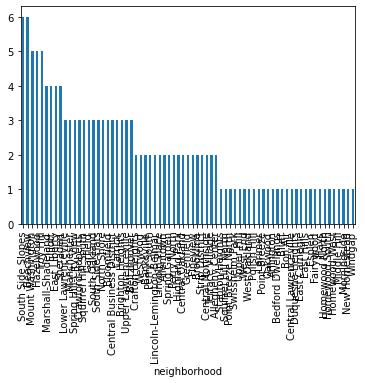

In [9]:
park_counts.plot(kind = "bar")

### Cloropleth Map
Obviously choosing a bar graph was a mistake, with all the different data points the labels keep overlapping. Instead let us utilize geopandas to create a *cloropleth map*, this will be especially useful since we only have one variable to plot. It may also give use some information about how neighborhoods with more recreation affect the surrounding neighborhoods. To start off lets read a shp file to get the general map of the different neighborhoods in Pittsburgh. This wil create a new geopandas dataframe under the name *neighborhoods*

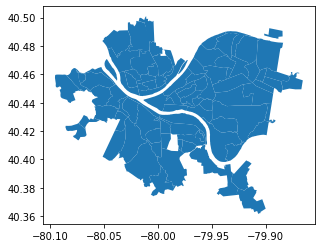

In [10]:
#Import the neccesary libraries
import geopandas as gpd
%matplotlib inline

#Reads shp file and plots the general map
neighborhoods = gpd.read_file("Neighborhood/Neighborhoods_.shp")
neighborhoods.plot()

### DF Merge
Next we need to merge the geopandas and our own dataframe so we can plot the corresponding data regarding park counts with the geometrical information stored insides the geopandas dataframe. We will include the *how='left'* statement so that if any of the neighborhoods did not include data in the dataset about parks, they will be labeled as *Nan*. Lets print out the hood and type column in the new merged *park_counts* dataframe to ensure the merge was succesful.

In [11]:
parks_map = neighborhoods.merge(park_counts,how='left',left_on='hood',right_on='neighborhood')
parks_map[['hood', 'type']]


,hood,type
0,Central Oakland,2.0
1,North Oakland,NaN
2,West Oakland,1.0
3,Crawford-Roberts,3.0
4,Strip District,2.0
...,...,...
85,Ridgemont,NaN
86,West End,1.0
87,California-Kirkbride,NaN
88,Glen Hazel,NaN


### Plot Time!!!
So we completed all the steps, so lets make the cloropleth map and use the in-built pandas style functions to make it look aesthetic and more easily readable to everyone. The grey color neighborhoods are all of the neighborhoods that did not contain park data in the data set.

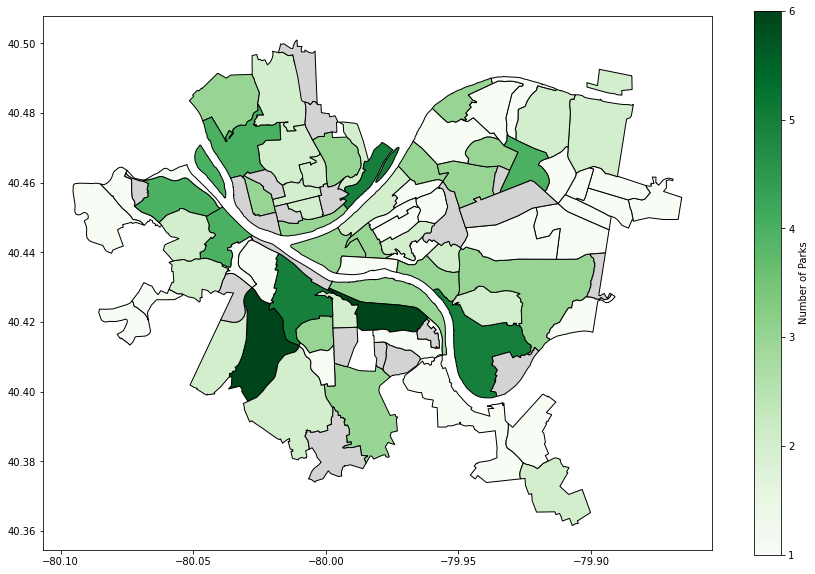

In [19]:
parks_map.plot(column = 'type',
              cmap = 'Greens',
              edgecolor = 'black',
              legend = True,
              legend_kwds = {'label' : "Number of Parks"},
              figsize = (15,10),
              missing_kwds = {"color" : "lightgrey"}
              )

#### This concludes the analysis of the number of parks in each neighborhood in Pittsburgh. This analysis will better help us determine the bets neighborhood in Pittaburgh for recreation.